### Test Code for Module SVM

In [1]:
include("./script.jl")
import .SVM

In [2]:
import Plots
import Random

In [3]:
include("../tools.jl")
import .JuTools

In [4]:
X_data1, Y_data1 = JuTools.data_generate_cluster_2d(pos1=(20.0, 20.0), pos2=(50.0, 50.0),
    radius1=5.0, radius2=5.0, random_scale=8.0, data_size=1000)
Y_data1 .= Y_data1 .* 2.0 .- 1.0
println(size(X_data1))
println(size(Y_data1))

(1000, 2)
(1000,)


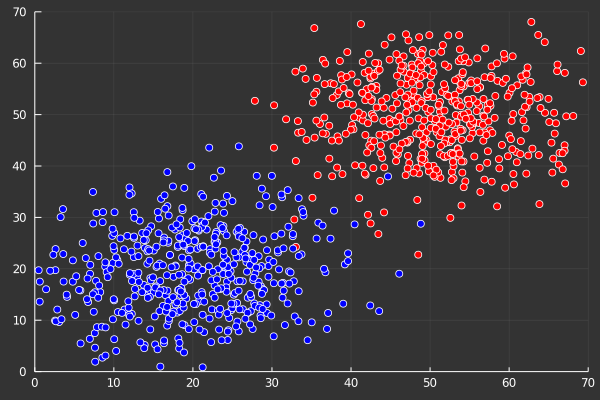

In [5]:
# plot the data
plot_X1 = [X_data1[i, 1] for i in 1:(size(X_data1)[1]) if Y_data1[i] == -1.0]
plot_Y1 = [X_data1[i, 2] for i in 1:(size(X_data1)[1]) if Y_data1[i] == -1.0]
plot_X2 = [X_data1[i, 1] for i in 1:(size(X_data1)[1]) if Y_data1[i] == 1.0]
plot_Y2 = [X_data1[i, 2] for i in 1:(size(X_data1)[1]) if Y_data1[i] == 1.0]
Plots.gr()
Plots.scatter(plot_X1, plot_Y1, leg=false, c="red", background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 70.0))
Plots.ylims!((0.0, 70.0))

### Linear SVM

In [6]:
weights = SVM.train_linear(X_data1, Y_data1, 1.0, learning_rate=0.05, max_iter=10, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data1, weights), Y_data1))

Accuracy: 0.5


In [7]:
weights = SVM.train_linear(X_data1, Y_data1, 1.0, learning_rate=0.05, max_iter=100, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data1, weights), Y_data1))

Accuracy: 0.5


In [8]:
weights = SVM.train_linear(X_data1, Y_data1, 1.0, learning_rate=0.05, max_iter=1000, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data1, weights), Y_data1))

Accuracy: 0.501


In [9]:
weights = SVM.train_linear(X_data1, Y_data1, 1.0, learning_rate=0.05, max_iter=10000, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data1, weights), Y_data1))

Accuracy: 0.989


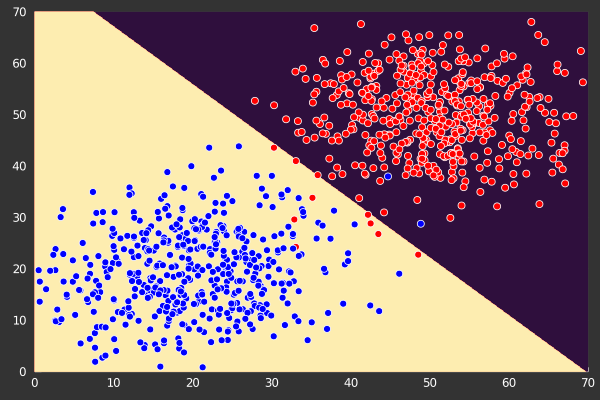

In [10]:
X_test_1 = 0:0.1:70
X_test_2 = 0:0.1:70
f_test1(X1, X2) = begin
   SVM.predict([X1, X2], weights)[1] 
end
Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test1, leg=false, fill=true, c=Plots.cgrad(:matter, rev=true, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 70.0))
Plots.ylims!((0.0, 70.0))

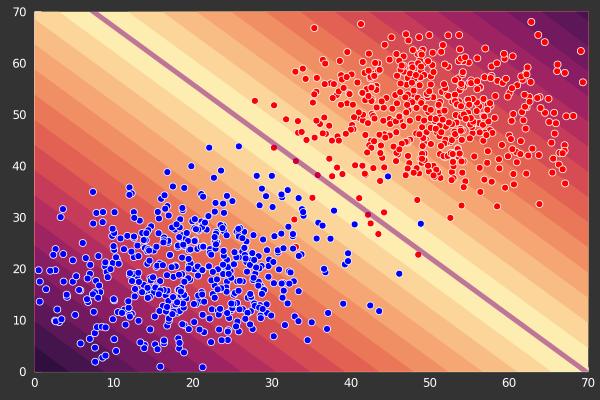

In [11]:
f_test2(X1, X2) = begin
   abs(SVM.predict_proba([X1, X2], weights)[1])
end
Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test2, leg=false, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
plot_X3 = collect(0:70)
plot_Y3 = -(weights.b .+ (weights.w[1] .* plot_X3)) ./ weights.w[2]
Plots.plot!(plot_X3, plot_Y3, c="purple", linewidth=5, alpha=0.5)
Plots.xlims!((0.0, 70.0))
Plots.ylims!((0.0, 70.0))

In [12]:
# try with different data
X_data2, Y_data2 = JuTools.data_generate_cluster_2d(pos1=(30.0, 80.0), pos2=(80.0, 30.0),
    radius1=5.0, radius2=10.0, random_scale=8.0, data_size=1000)
Y_data2 .= Y_data2 .* 2.0 .- 1.0
println(size(X_data2))
println(size(Y_data2))

(1000, 2)
(1000,)


In [13]:
weights = SVM.train_linear(X_data2, Y_data2, 1.0, learning_rate=0.05, max_iter=10000, early_stop=false, random_weights=false)
println("Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data2, weights), Y_data2))

Accuracy: 1.0


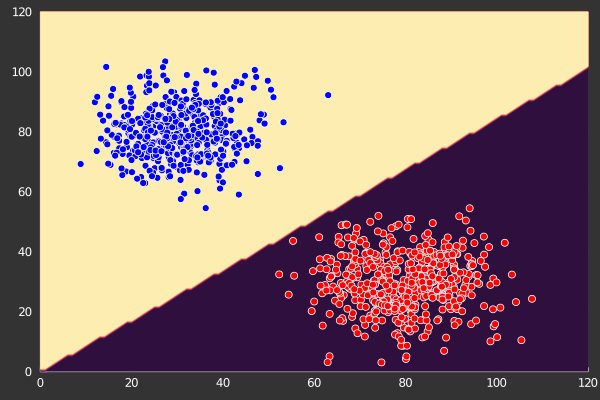

In [14]:
X_test_1 = 0:120
X_test_2 = 0:120
f_test1(X1, X2) = begin
   SVM.predict([X1, X2], weights)[1] 
end
plot_X1 = [X_data2[i, 1] for i in 1:(size(X_data2)[1]) if Y_data2[i] == -1.0]
plot_Y1 = [X_data2[i, 2] for i in 1:(size(X_data2)[1]) if Y_data2[i] == -1.0]
plot_X2 = [X_data2[i, 1] for i in 1:(size(X_data2)[1]) if Y_data2[i] == 1.0]
plot_Y2 = [X_data2[i, 2] for i in 1:(size(X_data2)[1]) if Y_data2[i] == 1.0]
Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test1, leg=false, fill=true, c=Plots.cgrad(:matter, rev=true, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 120.0))
Plots.ylims!((0.0, 120.0))

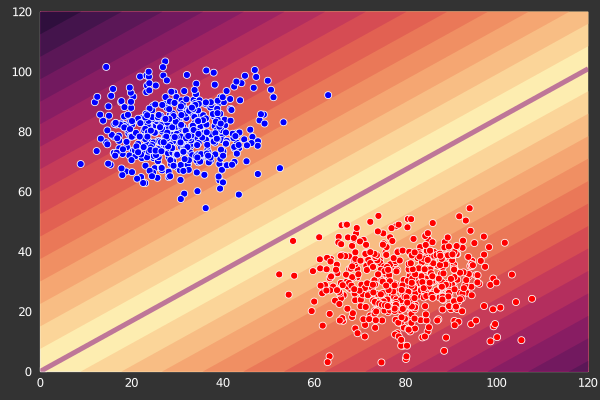

In [15]:
f_test2(X1, X2) = begin
   abs(SVM.predict_proba([X1, X2], weights)[1])
end
Plots.gr()
Plots.contour(X_test_1, X_test_2, f_test2, leg=false, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
plot_X3 = collect(0:120)
plot_Y3 = -(weights.b .+ (weights.w[1] .* plot_X3)) ./ weights.w[2]
Plots.plot!(plot_X3, plot_Y3, c="purple", linewidth=5, alpha=0.5)
Plots.xlims!((0.0, 120.0))
Plots.ylims!((0.0, 120.0))

### SVM (kernel tricks)

In [16]:
weights_linear = SVM.train(X_data2, Y_data2, 1.0, kernel="linear", gamma="scale", coef=0.0, degree=2.0, verbose=false)
println("Linear Kernel Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data2, X_data2, Y_data2, weights_linear), Y_data2))

Linear Kernel Accuracy: 1.0


In [17]:
weights_rbf = SVM.train(X_data2, Y_data2, 1.0, kernel="rbf", gamma="scale", coef=0.0, degree=2.0, verbose=false)
println("RBF Kernel Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data2, X_data2, Y_data2, weights_rbf), Y_data2))

RBF Kernel Accuracy: 1.0


In [18]:
weights_poly = SVM.train(X_data2, Y_data2, 1.0, kernel="polynomial", gamma="scale", coef=0.0, degree=2.0, verbose=false)
println("Polynomial Kernel (degree=2) Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data2, X_data2, Y_data2, weights_poly), Y_data2))

Polynomial Kernel (degree=2) Accuracy: 1.0


In [19]:
weights_poly_3 = SVM.train(X_data2, Y_data2, 1.0, kernel="polynomial", gamma="scale", coef=0.0, degree=3.0, verbose=false)
println("Polynomial Kernel (degree=3) Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data2, X_data2, Y_data2, weights_poly), Y_data2))

Polynomial Kernel (degree=3) Accuracy: 1.0


In [20]:
weights_sigmoid = SVM.train(X_data2, Y_data2, 10.0, kernel="sigmoid", gamma="scale", coef=0.0, degree=2.0, verbose=false)
println("Sigmoid Kernel Accuracy: ", JuTools.compute_accuracy(SVM.predict(X_data2, X_data2, Y_data2, weights_sigmoid), Y_data2))

Sigmoid Kernel Accuracy: 1.0


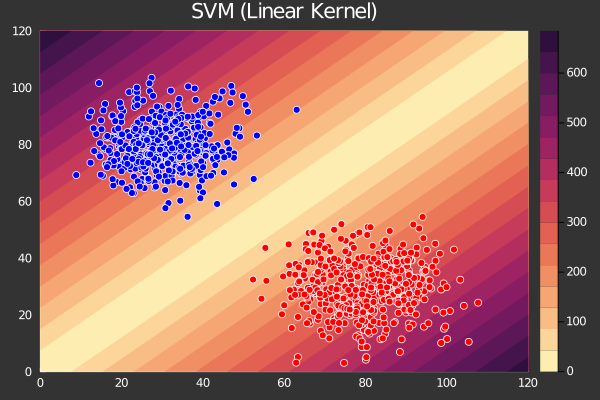

In [21]:
# plot the data
plot_X1 = [X_data2[i, 1] for i in 1:(size(X_data2)[1]) if Y_data2[i] == -1.0]
plot_Y1 = [X_data2[i, 2] for i in 1:(size(X_data2)[1]) if Y_data2[i] == -1.0]
plot_X2 = [X_data2[i, 1] for i in 1:(size(X_data2)[1]) if Y_data2[i] == 1.0]
plot_Y2 = [X_data2[i, 2] for i in 1:(size(X_data2)[1]) if Y_data2[i] == 1.0]

X_test_linear = hcat(vec(repeat(reshape(X_test_1, :, 1), 1, 121)'), vec(repeat(X_test_2, 121, 1)))
X_test_linear = abs.(reshape(SVM.predict_proba(X_test_linear, X_data2, Y_data2, weights_linear), 121, :))

Plots.gr()
plot_linear = Plots.contour(X_test_1, X_test_2, X_test_linear, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 120.0))
Plots.ylims!((0.0, 120.0))
Plots.title!("SVM (Linear Kernel)")

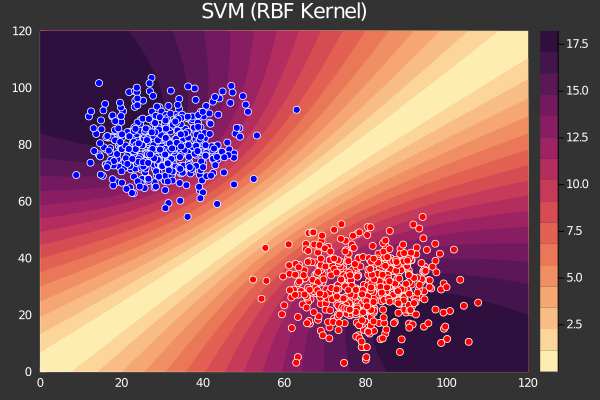

In [22]:
X_test_rbf = hcat(vec(repeat(reshape(X_test_1, :, 1), 1, 121)'), vec(repeat(X_test_2, 121, 1)))
X_test_rbf = abs.(reshape(SVM.predict_proba(X_test_rbf, X_data2, Y_data2, weights_rbf), 121, :))

Plots.gr()
plot_linear = Plots.contour(X_test_1, X_test_2, X_test_rbf, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 120.0))
Plots.ylims!((0.0, 120.0))
Plots.title!("SVM (RBF Kernel)")

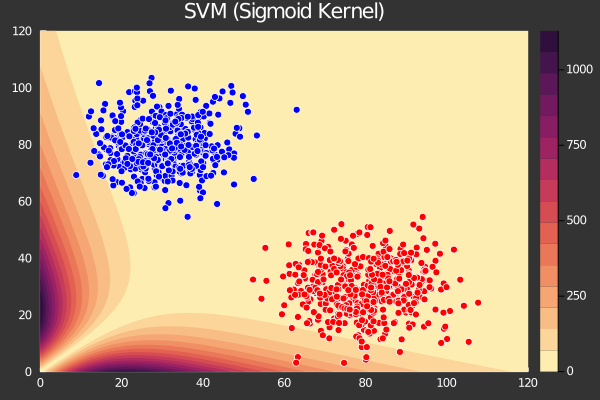

In [23]:
X_test_sigmoid = hcat(vec(repeat(reshape(X_test_1, :, 1), 1, 121)'), vec(repeat(X_test_2, 121, 1)))
X_test_sigmoid = abs.(reshape(SVM.predict_proba(X_test_sigmoid, X_data2, Y_data2, weights_sigmoid), 121, :))

Plots.gr()
plot_linear = Plots.contour(X_test_1, X_test_2, X_test_sigmoid, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 120.0))
Plots.ylims!((0.0, 120.0))
Plots.title!("SVM (Sigmoid Kernel)")

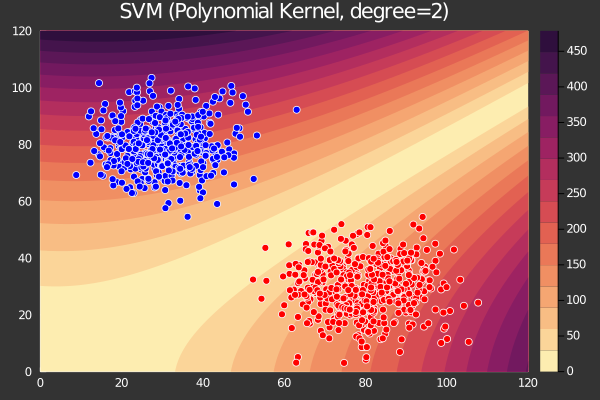

In [24]:
X_test_poly = hcat(vec(repeat(reshape(X_test_1, :, 1), 1, 121)'), vec(repeat(X_test_2, 121, 1)))
X_test_poly = abs.(reshape(SVM.predict_proba(X_test_poly, X_data2, Y_data2, weights_poly), 121, :))

Plots.gr()
plot_linear = Plots.contour(X_test_1, X_test_2, X_test_poly, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 120.0))
Plots.ylims!((0.0, 120.0))
Plots.title!("SVM (Polynomial Kernel, degree=2)")

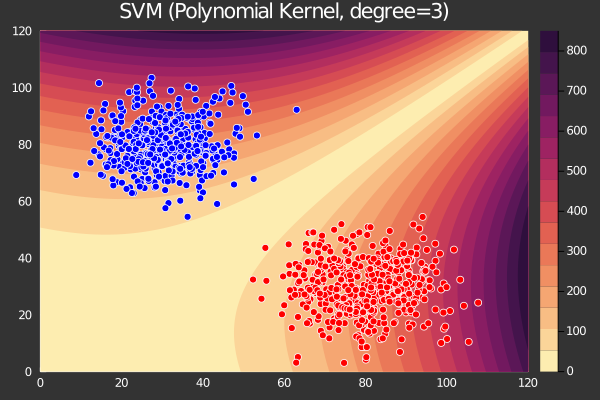

In [25]:
X_test_poly = hcat(vec(repeat(reshape(X_test_1, :, 1), 1, 121)'), vec(repeat(X_test_2, 121, 1)))
X_test_poly = abs.(reshape(SVM.predict_proba(X_test_poly, X_data2, Y_data2, weights_poly_3), 121, :))

Plots.gr()
plot_linear = Plots.contour(X_test_1, X_test_2, X_test_poly, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 120.0))
Plots.ylims!((0.0, 120.0))
Plots.title!("SVM (Polynomial Kernel, degree=3)")